##### Loading and Preparing Data for Various Model Testing:

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File path to your CSV file
file_path = '../Data_Analysis/features_important.csv'

# Read the CSV file into a DataFrame
new_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
new_df.head()


,Heart Attack Risk,Triglycerides,Income,Exercise Hours Per Week,BMI,Sedentary Hours Per Day,Age,Cholesterol,Diastolic_BP,Systolic_BP
0,0,286,261404,4.168189,31.251233,6.615001,67,208,88.0,158.0
1,0,235,285768,1.813242,27.194973,4.963459,21,389,93.0,165.0
2,0,587,235282,2.078353,28.176571,9.463426,21,324,99.0,174.0
3,0,378,125640,9.828130,36.464704,7.648981,84,383,100.0,163.0
4,0,231,160555,5.804299,21.809144,1.514821,66,318,88.0,91.0


##### Define features and target variable

In [17]:
# Define features and target variable
X = new_df[['Triglycerides', 'Income', 'Exercise Hours Per Week', 'BMI', 'Sedentary Hours Per Day',
            'Age', 'Cholesterol', 'Diastolic_BP', 'Systolic_BP']]
y = new_df['Heart Attack Risk']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### Feature Important analysis

##### KNN Model:

In [31]:
# Initializing and training KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# Generating and printing the classification report and confusion matrix for KNN
print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred))
print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70      1148
           1       0.34      0.24      0.29       605

    accuracy                           0.58      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.55      0.58      0.56      1753


KNN Confusion Matrix:
[[867 281]
 [457 148]]


##### Decision Tree Classifier Model

In [32]:
# Initializing and training Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Generating and printing the classification report and confusion matrix for Decision Tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      1148
           1       0.34      0.38      0.36       605

    accuracy                           0.54      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.55      0.54      0.54      1753


Decision Tree Confusion Matrix:
[[709 439]
 [375 230]]


##### Random Forest Model:

In [33]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500)

# Generating and printing the classification report and confusion matrix for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.97      0.78      1148
           1       0.45      0.05      0.09       605

    accuracy                           0.65      1753
   macro avg       0.56      0.51      0.44      1753
weighted avg       0.59      0.65      0.54      1753


Random Forest Confusion Matrix:
[[1112   36]
 [ 575   30]]


##### Logistic Regression Model:

In [34]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter=500)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_y_pred))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, logistic_y_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1148
           1       0.00      0.00      0.00       605

    accuracy                           0.65      1753
   macro avg       0.33      0.50      0.40      1753
weighted avg       0.43      0.65      0.52      1753


Logistic Regression Confusion Matrix:
[[1148    0]
 [ 605    0]]


C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\steve\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Bar Plot for Model Accuracies:

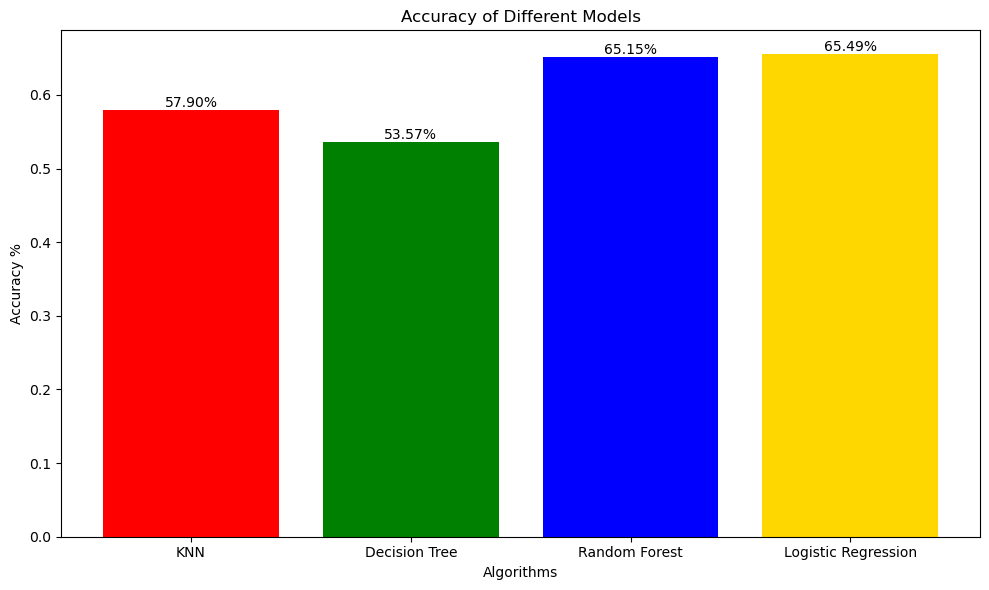

In [27]:
# Bar plot representing accuracy of different models
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']
accuracies = [knn_classifier.score(X_test, y_test),
              dt_classifier.score(X_test, y_test),
              rf_classifier.score(X_test, y_test),
              logistic_reg.score(X_test, y_test)]

plt.figure(figsize=(10, 6))
plt.title("Accuracy of Different Models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")

# Bar plot with accuracy values
bars = plt.bar(model_names, accuracies, color=['red', 'green', 'blue', 'gold'])

# Annotate each bar with its accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy*100:.2f}%',
             ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()


#### The model did not shown any major improvement rather than Logistic regression got better. Need to reenginearing to get better outcome.Testing with sectional analysis Model.